In [1]:
%load_ext autoreload
%autoreload 2
import sys, os
import requests
import json
import datetime
import time
sys.path.append('../')
import utils
from utils.haiku_scrape import scrape_haiku, replace_all, detokenize

In [ ]:
h_set = scrape_haiku()
h_set.append('Keep this in your mind. / Only after the clouds cry, / will the rainbow come') #good haiku but had trailing '/'
len(h_set)

# Using pushshift instead

In [7]:
datetime.date.today()

datetime.date(2021, 5, 25)

In [21]:
print(datetime.datetime.utcfromtimestamp(1523934121).strftime('%Y-%m-%d %H:%M:%S'))
print(datetime.date(2018,4,21).strftime('%Y-%m-%d %H:%M:%S'))

2018-04-17 03:02:01
2018-04-21 00:00:00


In [52]:
d1= datetime.date.today()#datetime.date(2013,9,1)
before = int(time.mktime(d1.timetuple()))
after = before - 7*24*60*60

x = requests.get(f'https://api.pushshift.io/reddit/search/submission/?subreddit=haiku&sort=top&sort_type=created_utc&after={after}&before={before}&size=1000').json()
len(x['data'])

100

x

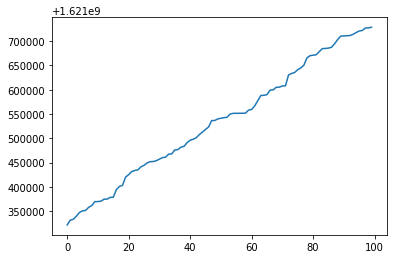

In [58]:
import matplotlib.pyplot as plt
plt.plot([el['created_utc'] for el in x['data']])

In [47]:
def get_titles(num=100):
    '''iterates over weeks of posts (since there are at least 100 posts a week)
    num is multiple of 100'''
    titles = []
    d1 = datetime.date.today()#datetime.date(2013,9,1)
    before = int(time.mktime(d1.timetuple()))
    after = before - 7*24*60*60
    for i in range(int(num/100)):
        resp = requests.get(f'https://api.pushshift.io/reddit/search/submission/?subreddit=haiku&sort=desc&sort_type=created_utc&after={after}&before={before}&size=1000').json()['data']
        titles.extend([el['title'] for el in resp])
        before = after
        after = before - 7*24*60*60
    return list(set(titles))

s = get_titles(4000)
len(s)

3763

# Emoji removal

[' ', '!', '"', "'", ',', '.', '/', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


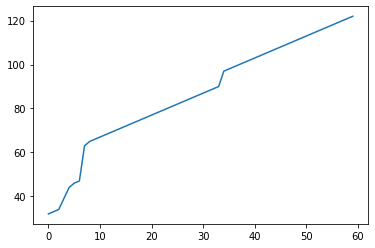

In [154]:
all_s = ''
for i in h_set:
    all_s += i
print(sorted(set(all_s)))
plt.plot(sorted([ord(i) for i in set(all_s)]))

In [74]:
x = sorted([ord(i) for i in set(all_s)])
print(x)
chr(8221)

[32, 33, 34, 38, 39, 40, 41, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 94, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 233, 8212, 8217, 8220, 8221, 8230, 9925, 11834, 65039, 65295, 65340, 127843, 127849, 127969, 128520]


'”'

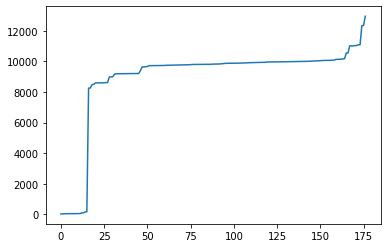

In [103]:
with open('../data/emoji-data.txt','r') as f:
    x = f.read()
x = [i for ix, i in enumerate(x) if x[ix-1] == '(' ]
ords = sorted([ord(i) for i in x])
plt.plot(ords[:177])

In [105]:
np.argmax(np.diff(ords[:177]))

15